In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [105]:
train = pd.read_csv("C://Users//hp//Coaching//3Third and Dushera//train.csv")
test = pd.read_csv("C://Users//hp//Coaching//3Third and Dushera//test.csv")

In [106]:
train.shape

(8523, 12)

In [107]:
test.shape

(5681, 11)

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [110]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [111]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [112]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [114]:
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())
test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [115]:
categorical = train.dtypes[train.dtypes == "object"].index

print(categorical)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [116]:
train[categorical].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


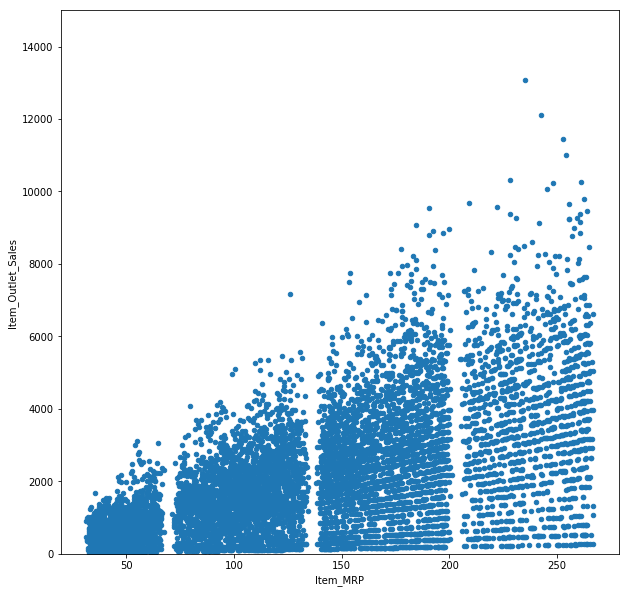

In [117]:
train.plot(kind='scatter',
           x='Item_MRP',
           y='Item_Outlet_Sales',
           figsize=(10,10),
           ylim=(0,15000))

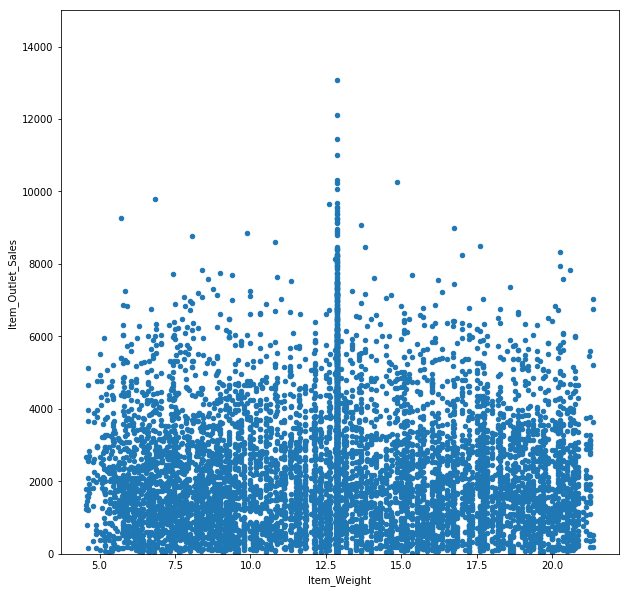

In [118]:
train.plot(kind='scatter',
           x='Item_Weight',
           y='Item_Outlet_Sales',
           figsize=(10,10),
           ylim=(0,15000))

In [119]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [120]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [121]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [122]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [123]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [124]:
#Checking the mean of the given values of Output sales
mean = train['Item_Outlet_Sales'].mean()
print(mean)

2181.2889135750365


In [125]:
SSE=0;
for i in train['Item_Outlet_Sales']:
    SSE = SSE +(mean - i)**2;
RMSE = (SSE/train.shape[0])**0.5
print(RMSE)

1706.39950136


In [126]:
groupby_size = train['Item_Outlet_Sales'].groupby(train['Outlet_Size'])

In [127]:
groupby_size.mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [128]:
#First Attempt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors = train.loc[:,["Item_MRP"]]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)

lreg.score(predictors, to_predict)

print("Coefficients: \n",lreg.coef_)
print("Intersecpts: \n",lreg.intercept_)

train_predictions = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_predictions, train['Item_Outlet_Sales'])**0.5

print("RMSE: \n",RMSE)
print("R-squared: \n",lreg.score(predictors, to_predict)
)

Coefficients: 
 [ 15.55302354]
Intersecpts: 
 -11.5751428252
RMSE: 
 1404.91638686
R-squared: 
 0.322140752498


In [129]:
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

In [130]:
test['Outlet_Establishment_Year'] = 2013 - test['Outlet_Establishment_Year']

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Visibility']]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)

RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [   12.6179102     15.55676418 -4382.52991617]
Intercept: 
 86.3329035488
RMSE: 
 1383.86386328
R-Squared: 
 0.342303839566


In [132]:
train['Outlet_Size'].fillna('Small',inplace=True)
test['Outlet_Size'].fillna('Small',inplace=True)

In [133]:
train["Outlet_Size"][train["Outlet_Size"] == "Small"] = 0
train["Outlet_Size"][train["Outlet_Size"] == "Medium"] = 1
train["Outlet_Size"][train["Outlet_Size"] == "High"] = 2

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
test["Outlet_Size"][test["Outlet_Size"] == "Small"] = 0
test["Outlet_Size"][test["Outlet_Size"] == "Medium"] = 1
test["Outlet_Size"][test["Outlet_Size"] == "High"] = 2

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [135]:
train['Outlet_Size'].value_counts()

0    4798
1    2793
2     932
Name: Outlet_Size, dtype: int64

In [136]:
test['Outlet_Size'].value_counts()

0    3198
1    1862
2     621
Name: Outlet_Size, dtype: int64

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Visibility','Outlet_Size']]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [ -1.12472842e+00   1.55518994e+01  -3.73373128e+03   3.87178612e+02]
Intercept: 
 41.0067173774
RMSE: 
 1363.42180313
R-Squared: 
 0.361590944847


In [138]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                               'reg':'Regular',
                                                               'low fat':'Low Fat'})
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [139]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                               'reg':'Regular',
                                                               'low fat':'Low Fat'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [140]:
#Here:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].replace({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [141]:
#Here:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test['Item_Type_Combined'] = test['Item_Type_Combined'].replace({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [142]:
#Here:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [143]:
#Here:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Item_Type_Combined']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [145]:
train['Item_Fat_Content'].value_counts()

0    3918
2    3006
1    1599
Name: Item_Fat_Content, dtype: int64

In [146]:
test['Item_Fat_Content'].value_counts()

0    2581
2    2013
1    1087
Name: Item_Fat_Content, dtype: int64

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors_list=['Outlet_Establishment_Year','Item_MRP','Item_Visibility','Outlet_Size',
                  'Item_Type_Combined','Item_Fat_Content']
predictors = train.loc[:,predictors_list]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [ -1.06157202e+00   1.55612178e+01  -3.76473727e+03   3.86644015e+02
  -4.75588410e+01   2.95574744e+01]
Intercept: 
 66.705721284
RMSE: 
 1363.02996554
R-Squared: 
 0.361957840428


In [148]:
#One Hot Coding:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Item_Type_Combined','Outlet_Size'])
test = pd.get_dummies(test, columns=['Item_Fat_Content','Item_Type_Combined','Outlet_Size'])

In [149]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
dtype: object

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors_list=['Outlet_Establishment_Year','Item_MRP','Item_Visibility',
                  'Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2',
                  'Item_Type_Combined_0','Item_Type_Combined_1','Item_Type_Combined_2','Outlet_Size_0',
                  'Outlet_Size_1','Outlet_Size_2']
predictors = train.loc[:,predictors_list]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors)
RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [    6.51457637    15.56695363 -3724.37163231   -11.01584984   -24.87212287
    35.88797272    -5.54286201    30.41498489   -24.87212287  -356.32580303
   410.43248307   -54.10668005]
Intercept: 
 186.358176348
RMSE: 
 1339.68744982
R-Squared: 
 0.383624246026


In [151]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [152]:
test['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT035    620
OUT049    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [153]:
le = LabelEncoder()
#New variable for outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])

In [154]:
le = LabelEncoder()
#New variable for outlet
test['Outlet'] = le.fit_transform(test['Outlet_Identifier'])

In [155]:
train = pd.get_dummies(train, columns=['Outlet'])
test = pd.get_dummies(test, columns=['Outlet'])

In [156]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
Outlet_5                       uint8
Outlet_6                       uint8
Outlet_7                       uint8
O

In [157]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
Outlet_5                       uint8
Outlet_6                       uint8
Outlet_7                       uint8
Outlet_8                       uint8
O

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

predictors_list=['Outlet_Establishment_Year','Item_MRP','Item_Visibility',
                  'Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2',
                  'Item_Type_Combined_0','Item_Type_Combined_1','Item_Type_Combined_2','Outlet_Size_0',
                  'Outlet_Size_1','Outlet_Size_2','Outlet_0','Outlet_1','Outlet_2','Outlet_3',
                   'Outlet_4','Outlet_5','Outlet_6','Outlet_7','Outlet_8','Outlet_9']
predictors = train.loc[:,predictors_list]
predictors1 = test.loc[:,predictors_list]

to_predict = train["Item_Outlet_Sales"]

lreg.fit(predictors, to_predict)
lreg.score(predictors, to_predict)

print('Coefficient: \n', lreg.coef_)
print('Intercept: \n', lreg.intercept_)

train_prediction = lreg.predict(X = predictors1)
#RMSE = mean_squared_error(train_prediction, train["Item_Outlet_Sales"])**0.5

print('RMSE: \n',RMSE)
print('R-Squared: \n',lreg.score(predictors, to_predict))

Coefficient: 
 [  -10.25238363    15.55584063  -304.43087295   -14.06201496   -13.71055459
    27.77256955    -1.57759593    15.28815052   -13.71055459  -470.07354626
   367.06032788   103.01321838 -1373.32229647   103.01321838   543.82091712
  -694.17447313 -1221.89169635  1278.88826828   615.38559125   423.43160583
   542.50233236  -217.65346726]
Intercept: 
 169.031334956
RMSE: 
 1339.68744982
R-Squared: 
 0.563515907149


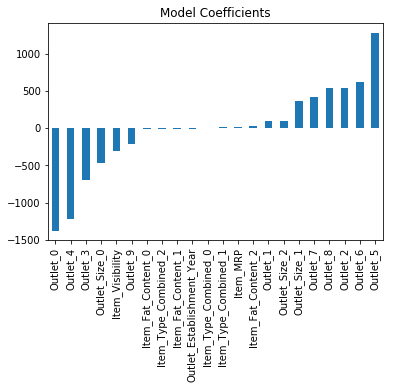

In [159]:
coef1 = pd.Series(lreg.coef_, predictors_list).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [160]:
submission = pd.DataFrame({
        "Item_Identifier": test["Item_Identifier"],
        "Outlet_Identifier": test["Outlet_Identifier"],
        "Item_Outlet_Sales":train_prediction
    })
submission.to_csv('submission.csv', index=False)